# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
imdf_cyber = pd.read_csv("ExportedDatasets/cyberbullying_dataset.csv")

### 3.  Check first 10 lines

In [3]:
imdf_cyber.head(10)

tweet_text  cyberbullying_type
0         In other words your food was crapilicious                    0
1                                   Why is so white                    0
2         a classy whore Or more red velvet cupcakes                   0
3  meh P  thanks for the heads up but not too con...                   0
4  This is an ISIS account pretending to be a Kur...                   0
5  Yes the test of god is that good or bad or ind...                   0
6  Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7  Karma I hope it bites Kat on the butt She is j...                   0
8                    everything but mostly my priest                   0
9  Rebecca Black Drops Out of School Due to Bullying                   0

### 4. Check Datasets type values and sum & drop duplicates

In [4]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91801 entries, 0 to 91800
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          91801 non-null  object
 1   cyberbullying_type  91801 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
imdf_cyber['cyberbullying_type'].value_counts()

1    50178
0    41623
Name: cyberbullying_type, dtype: int64

In [6]:
imdf_cyber.tweet_text.duplicated().sum()

40901

In [7]:
imdf_cyber.duplicated().sum()

37337

In [8]:
imdf_cyber.duplicated(subset=['tweet_text']).sum()

40901

In [9]:
final_dataset = imdf_cyber.drop_duplicates()
final_dataset.to_csv('ExportedDatasets/cyberbullying_dataset_duplicates.csv')

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54464 entries, 0 to 79706
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54464 non-null  object
 1   cyberbullying_type  54464 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
final_dataset['cyberbullying_type'].value_counts()

1    39990
0    14474
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

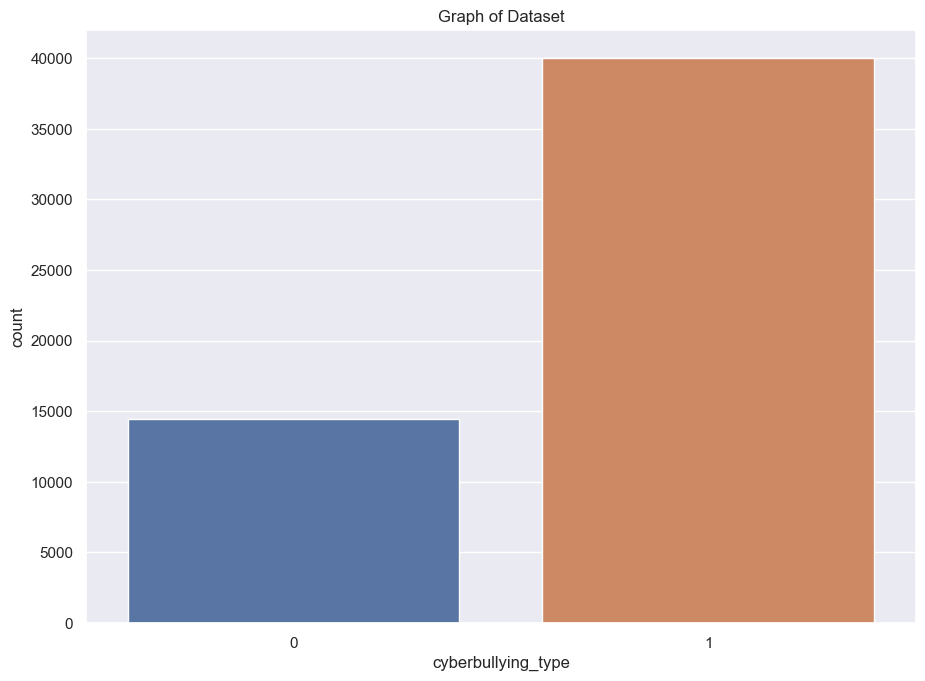

In [12]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=final_dataset).set(title="Graph of Dataset")

### 5.1.1  Handle Imbalanced Dataset

In [13]:
cyberbullying = final_dataset[final_dataset.cyberbullying_type == 1]
print(cyberbullying)

                                              tweet_text  cyberbullying_type
7819   rape is realzvasiyana nema jokes about being d...                   1
7820   You never saw any celebrity say anything like ...                   1
7821   I mean hes gay but he uses gendered slurs and ...                   1
7822                                            feminazi                   1
7823   Rape is rape And the fact that I read one post...                   1
...                                                  ...                 ...
63871  I didnt think Id hate a couple more than these...                   1
63891  Nope call me sexist but gender roles are defin...                   1
63896   Some of you people will call me sexist and mi...                   1
63904        Im not sexist but I hate all female rappers                   1
79706   A Misogynist A woman wants her man to treat h...                   1

[39990 rows x 2 columns]


In [14]:
no_cyberbullying = final_dataset[final_dataset.cyberbullying_type == 0]
print(no_cyberbullying)

                                              tweet_text  cyberbullying_type
0             In other words your food was crapilicious                    0
1                                       Why is so white                    0
2             a classy whore Or more red velvet cupcakes                   0
3      meh P  thanks for the heads up but not too con...                   0
4      This is an ISIS account pretending to be a Kur...                   0
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[14474 rows x 2 columns]


In [15]:
cyberbullying_sample = cyberbullying.sample(n=15526)

In [16]:
print(cyberbullying_sample.shape)

(15526, 2)


In [17]:
final_dataset = pd.concat([cyberbullying_sample, no_cyberbullying], axis=0)

In [18]:
final_dataset.head()

tweet_text  cyberbullying_type
48448   For Halloween most or you girls should just g...                   1
8626   Rape jokes are okay Just like fat jokes gay jo...                   1
9688   those pieces to camera are recorded after the ...                   1
26887  but regardless i posted a screenshot of someth...                   1
12389                       These girls are prettyawful                    1

In [19]:
final_dataset.shape

(30000, 2)

In [20]:
final_dataset.info

<bound method DataFrame.info of                                               tweet_text  cyberbullying_type
48448   For Halloween most or you girls should just g...                   1
8626   Rape jokes are okay Just like fat jokes gay jo...                   1
9688   those pieces to camera are recorded after the ...                   1
26887  but regardless i posted a screenshot of someth...                   1
12389                       These girls are prettyawful                    1
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[30000 rows x 2 columns]>

### 6.  WordCloud of Dataset

In [21]:
text = ''.join(final_dataset["tweet_text"].tolist())

In [22]:
''.join(final_dataset["tweet_text"].tolist())

' For Halloween most or you girls should just go without makeupRape jokes are okay Just like fat jokes gay jokes genocidal jokes slave jokes pope jokes and religious jokesthose pieces to camera are recorded after the event Kat knows she gets smacked down and she STILL gloats like a crazy Bond villainbut regardless i posted a screenshot of something i love doing and you made digs about it being out of date so whateverThese girls are prettyawful Teens with nightvision cameras spy on school bullies in The Heart of Applebutter Hill by Donna W Hill Hmm  Cathy Young and who are other twowhy do they all look like the girls who bullied me in high school im triggeredfuck you dumb bitch fuck shit nigger assthere was one where theres like this dude hes big and the hands out of the groundIgnorant people who automatically think its okay to attack a cop but when u get shot and killed Its racism because your coloredI need some head and if youre a good Christian woman youll help me out with that right

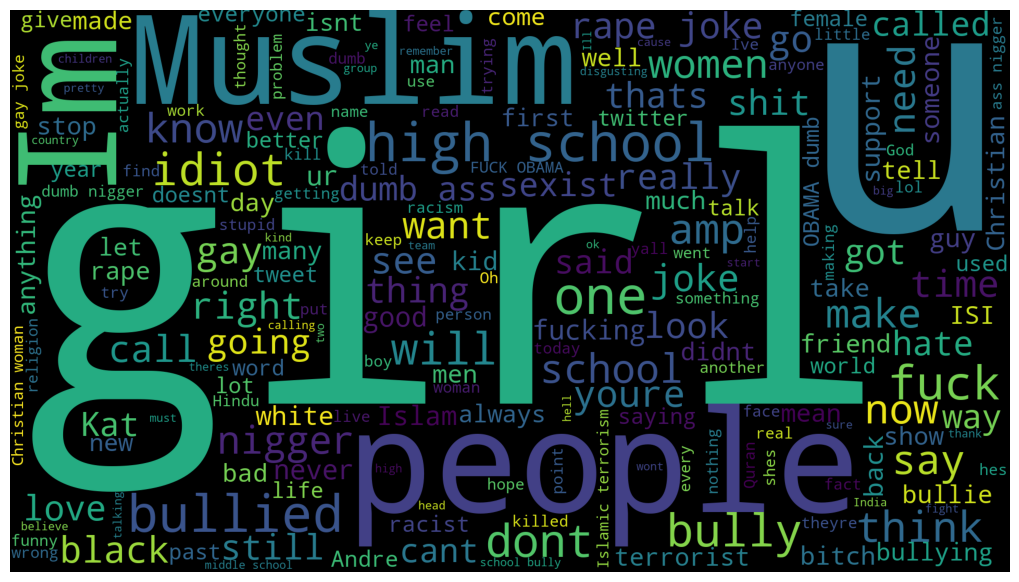

In [23]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Stopwords

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [26]:
final_dataset.shape

(30000, 2)

In [27]:
final_dataset.head()

tweet_text  cyberbullying_type
48448   For Halloween most or you girls should just g...                   1
8626   Rape jokes are okay Just like fat jokes gay jo...                   1
9688   those pieces to camera are recorded after the ...                   1
26887  but regardless i posted a screenshot of someth...                   1
12389                       These girls are prettyawful                    1

In [28]:
final_dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [29]:
#separating tweet_text & cyberbullying_type
X = final_dataset.drop(columns='cyberbullying_type', axis=1)
Y = final_dataset['cyberbullying_type']
X.to_csv('ExportedDatasets/cyberbullying_X.csv')
Y.to_csv('ExportedDatasets/cyberbullying_Y.csv')

In [30]:
print(X)
print(Y)

                                              tweet_text
48448   For Halloween most or you girls should just g...
8626   Rape jokes are okay Just like fat jokes gay jo...
9688   those pieces to camera are recorded after the ...
26887  but regardless i posted a screenshot of someth...
12389                       These girls are prettyawful 
...                                                  ...
63915  Soz my kitchen rules Ive lost interest the ins...
63916  Feeling so sorry for the girls they should be ...
63917  pretty good dishes were happy with  OK well Im...
63919              You are too stupid to talk to Blocked
63920  And before you protest that youre not mad ther...

[30000 rows x 1 columns]
48448    1
8626     1
9688     1
26887    1
12389    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


### 9. Stemming: Process of reducing a word to its root word

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
final_dataset['tweet_text'] = final_dataset['tweet_text'].apply(stemming)

In [34]:
print(final_dataset['tweet_text'])

48448                     halloween girl go without makeup
8626     rape joke okay like fat joke gay joke genocid ...
9688     piec camera record event kat know get smack st...
26887    regardless post screenshot someth love made di...
12389                                        girl prettyaw
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [35]:
text = ''.join(final_dataset["tweet_text"].tolist())
''.join(final_dataset["tweet_text"].tolist())

'halloween girl go without makeuprape joke okay like fat joke gay joke genocid joke slave joke pope joke religi jokepiec camera record event kat know get smack still gloat like crazi bond villainregardless post screenshot someth love made dig date whatevgirl prettyawteen nightvis camera spi school bulli heart applebutt hill donna w hillhmm cathi young twolook like girl bulli high school im triggerfuck dumb bitch fuck shit nigger assone there like dude he big hand groundignor peopl automat think okay attack cop u get shot kill racism colorneed head your good christian woman youll help rightlet give fact end went canada start boot lick seat elect fail shift focu india know mani gullibl idiot would believ anyth would anti muslim go supportgpa secondincommand student council one leader debat club im leav school recept ladi saw paper said must talk vice princip give diploma academ excelfuck obama dumb ass nigger hahahaha mad fat ass daddiact world gone haywir white devil speci satan god peo

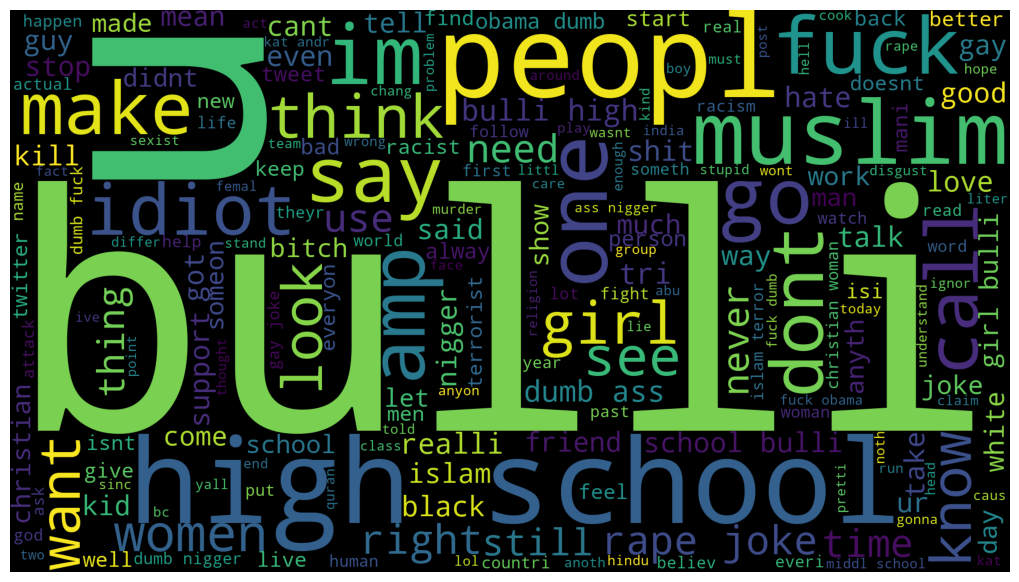

In [36]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
#separating tweet_text & cyberbullying_type
X = final_dataset['tweet_text']
Y = final_dataset['cyberbullying_type']

In [38]:
print(X)

48448                     halloween girl go without makeup
8626     rape joke okay like fat joke gay joke genocid ...
9688     piec camera record event kat know get smack st...
26887    regardless post screenshot someth love made di...
12389                                        girl prettyaw
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [39]:
X.shape

(30000,)

In [40]:
print(Y)

48448    1
8626     1
9688     1
26887    1
12389    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


In [41]:
Y.shape

(30000,)

### 11. Train/Test Splitting

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [43]:
X_train.shape

(22500,)

In [44]:
X_test.shape

(7500,)

In [45]:
Y_train.shape

(22500,)

In [46]:
Y_test.shape

(7500,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [47]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [48]:
print(X_train_transform)

  (0, 19755)	0.21255138256498185
  (0, 14511)	0.16149779030953948
  (0, 6825)	0.13826049379672867
  (0, 16902)	0.278975038045345
  (0, 6206)	0.19391232692271407
  (0, 9659)	0.22846792480319725
  (0, 2424)	0.10069795427448817
  (0, 10139)	0.11524367604520094
  (0, 7005)	0.12561166112675193
  (0, 15478)	0.11022694817378381
  (0, 7926)	0.12934384212264932
  (0, 3000)	0.3567345840735835
  (0, 8151)	0.22804925340181645
  (0, 5250)	0.2141834956818943
  (0, 15914)	0.1626061196579964
  (0, 11439)	0.287139898806541
  (0, 3700)	0.31346419159425865
  (0, 5390)	0.3567345840735835
  (0, 19327)	0.21739204269997045
  (0, 1868)	0.15509956293246427
  (0, 5146)	0.12734836637869787
  (0, 10409)	0.16381593805468733
  (1, 4776)	0.30850352344369436
  (1, 12045)	0.5670905246764573
  (1, 13190)	0.20187150053760186
  :	:
  (22498, 15963)	0.2574752618675325
  (22498, 17360)	0.27144962209151735
  (22498, 17357)	0.6081658040975375
  (22498, 7809)	0.24139552309162557
  (22498, 19608)	0.16876954416071177
  (22498, 

In [49]:
print(X_test_transform)

  (1, 16813)	0.5585264832270009
  (1, 16800)	0.45137111402940866
  (1, 11887)	0.35091032051512133
  (1, 11502)	0.5310630292768141
  (1, 4964)	0.2813295058205552
  (2, 19326)	0.24924990482265658
  (2, 18234)	0.1983798361428702
  (2, 17050)	0.19216234486780526
  (2, 15952)	0.2917218003359909
  (2, 15478)	0.20173625217127863
  (2, 13576)	0.1775902511819916
  (2, 10110)	0.16817865071201696
  (2, 9564)	0.15511727311651352
  (2, 8737)	0.2350890302532737
  (2, 7662)	0.22874636118768582
  (2, 7146)	0.14845833814629178
  (2, 7115)	0.20793413369853403
  (2, 5883)	0.18201487549680712
  (2, 5702)	0.1708233160040481
  (2, 5233)	0.2350890302532737
  (2, 3826)	0.4860648270951833
  (2, 2424)	0.18429638335466117
  (2, 2295)	0.2018630654516955
  (2, 1791)	0.22470588697116786
  (3, 19235)	0.3127216783807531
  :	:
  (7495, 5083)	0.2857072932299663
  (7495, 4258)	0.3169012420836807
  (7495, 2156)	0.300607097486945
  (7495, 1344)	0.1977092858857844
  (7496, 8522)	0.8369389181669368
  (7496, 6136)	0.54729630

### 12. Training the Model: Logistic Regression (LR)

In [50]:
modelLR = LogisticRegression()

In [51]:
modelLR.fit(X_train_transform, Y_train)

LogisticRegression()

#### Evaluation: Accuracy Score

In [52]:
X_train_prediction = modelLR.predict(X_train_transform)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [53]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8630222222222222


In [54]:
X_test_prediction = modelLR.predict(X_test_transform)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8282666666666667


In [56]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4000
           1       0.78      0.87      0.83      3500

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500



### 13. Training the Model: Support Vector Machine(SVM)

In [57]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(X_train_transform, Y_train)

LinearSVC(C=0.0001)

In [58]:
svm_predict = svm.predict(X_train_transform)
svm_training_data_accuracy = accuracy_score(Y_train,svm_predict)

print('Accuracy score of the training data : ', svm_training_data_accuracy)

Accuracy score of the training data :  0.5211555555555556


In [59]:
svm_predict_test = svm.predict(X_test_transform)
svm_test_data_accuracy = accuracy_score(Y_test,svm_predict_test)

print('Accuracy score of the test data : ', svm_test_data_accuracy)

Accuracy score of the test data :  0.5217333333333334


In [60]:
print(classification_report(svm_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.01      0.96      0.01        25
           1       1.00      0.52      0.68      7475

    accuracy                           0.52      7500
   macro avg       0.50      0.74      0.35      7500
weighted avg       1.00      0.52      0.68      7500



### 14. Training the Model: Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transform, Y_train)

MultinomialNB()

In [62]:
from sklearn.metrics import accuracy_score
nb_predict = mnb.predict(X_train_transform)
nb_training_data_accuracy = accuracy_score(Y_train,nb_predict)

print('Accuracy score of the training data : ', nb_training_data_accuracy)

Accuracy score of the training data :  0.8268444444444445


In [63]:
nb_predict_test = mnb.predict(X_test_transform)
nb_test_data_accuracy = accuracy_score(Y_test,nb_predict_test)

print('Accuracy score of the test data : ', nb_test_data_accuracy)

Accuracy score of the test data :  0.7490666666666667


In [64]:
print(classification_report(nb_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      2700
           1       0.88      0.71      0.78      4800

    accuracy                           0.75      7500
   macro avg       0.74      0.76      0.74      7500
weighted avg       0.78      0.75      0.75      7500



### 15. Training the Model: Decision Tree


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_transform,Y_train)

DecisionTreeClassifier()

In [66]:
dt_predict = dt.predict(X_train_transform)
dt_training_data_accuracy= accuracy_score(Y_train, dt_predict)

print('Accuracy score of the training data : ', dt_training_data_accuracy)

Accuracy score of the training data :  0.9636888888888889


In [67]:
dt_predict_test = dt.predict(X_test_transform)
dt_test_data_accuracy=accuracy_score(Y_test, dt_predict_test)

print('Accuracy score of the test data : ', dt_test_data_accuracy)

Accuracy score of the test data :  0.7841333333333333


In [68]:
print(classification_report(dt_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3759
           1       0.77      0.80      0.79      3741

    accuracy                           0.78      7500
   macro avg       0.78      0.78      0.78      7500
weighted avg       0.78      0.78      0.78      7500



### 16. Training the Model: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_transform, Y_train)

RandomForestClassifier(n_estimators=30)

In [70]:
rf_predict = rf.predict(X_train_transform)
rf_training_data_accuracy=accuracy_score(Y_train, rf_predict)

print('Accuracy score of the training data : ', rf_training_data_accuracy)

Accuracy score of the training data :  0.9631555555555555


In [71]:
rf_predict_test = rf.predict(X_test_transform)
rf_test_data_accuracy=accuracy_score(Y_test, rf_predict_test)
print('Accuracy score of the test data : ', rf_test_data_accuracy)

Accuracy score of the test data :  0.8072


In [72]:
print(classification_report(rf_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3928
           1       0.77      0.84      0.81      3572

    accuracy                           0.81      7500
   macro avg       0.81      0.81      0.81      7500
weighted avg       0.81      0.81      0.81      7500



### 17. Training the Model: XGBoost

In [73]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train_transform,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
xgb_prediction = modelXGB.predict(X_train_transform)
xgb_training_data_accuracy=accuracy_score(Y_train, xgb_prediction)

print('Accuracy score of the training data : ', xgb_training_data_accuracy)

Accuracy score of the training data :  0.8662666666666666


In [75]:
xgb_prediction_test = modelXGB.predict(X_test_transform)
xgb_test_data_accuracy=accuracy_score(Y_test, xgb_prediction_test)

print('Accuracy score of the test data : ', xgb_test_data_accuracy)

Accuracy score of the test data :  0.8428


In [76]:
print(classification_report(xgb_prediction_test,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4329
           1       0.76      0.93      0.83      3171

    accuracy                           0.84      7500
   macro avg       0.85      0.85      0.84      7500
weighted avg       0.86      0.84      0.84      7500



### 18.Summary

In [77]:
from sklearn.ensemble import VotingClassifier
# 1) naive bayes = mnb
# 2) logistic regression =modelLR
# 3) random forest =rf
# 4) support vector machine = svm
# 5) Decision Tree = dt
# 6) XGBoost = modelXGB
evc=VotingClassifier(estimators=[('mnb',mnb),('modelLR',modelLR),('rf',rf),('svm',svm),('dt',dt),('modelXGB',modelXGB)],voting='hard')
evc.fit(X_train_transform, Y_train)
evc_prediction = evc.predict(X_train_transform)
evc_prediction_test = evc.predict(X_test_transform)
evc_accuracy = accuracy_score(Y_train, evc_prediction)
evc_accuracy_test = accuracy_score(Y_test, evc_prediction_test)
print("score on test: " , evc_accuracy_test)
print("score on train: ", evc_accuracy)

score on test:  0.828
score on train:  0.9304888888888889
